<a href="https://colab.research.google.com/github/virf96/Proyectos/blob/master/Series_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primero descargaremos los datos que vamos a utilizar:

$\bullet$ **DAX** el índice de acciones blue chip de las 30 compañías más grandes de Alemania que cotizan en la Bolsa de Frankfurt

$\bullet$ **FTSE 100** es el índice bursátil de referencia de la Bolsa de Valores de Londres.

$\bullet$ **S&P500** es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado.​

$\bullet$ **NIKKEI** es el índice bursátil más popular del mercado japonés, lo componen los 225 valores más líquidos que cotizan en la Bolsa de Tokio.

especificar los nombres, la fecha de inicio y fin, y el intervalo (diario=1d):

In [ ]:
import pandas as pd
import numpy as np

!pip install yfinance
import yfinance


In [197]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", 
                              end = "2019-09-01", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
df_comp = raw_data.copy()

[*********************100%***********************]  4 of 4 completed


In [198]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [199]:
df_comp.head()

^GDAXI               ...         ftse        nikkei
                   Open         High  ...                           
Date                                  ...                           
1994-01-07  2218.959961  2227.639893  ...  3446.000000  18124.009766
1994-01-10  2231.840088  2238.010010  ...  3440.600098  18443.439453
1994-01-11  2225.429932  2235.610107  ...  3413.800049  18485.250000
1994-01-12  2227.120117  2227.790039  ...  3372.000000  18793.880859
1994-01-13  2171.500000  2183.709961  ...  3360.000000  18577.259766

[5 rows x 24 columns]

In [200]:
df_comp.tail()

^GDAXI                ...         ftse        nikkei
                    Open          High  ...                           
Date                                    ...                           
2019-08-26  11619.660156  11696.780273  ...          NaN  20261.039062
2019-08-27  11638.509766  11778.620117  ...  7089.600098  20456.080078
2019-08-28  11704.669922  11717.790039  ...  7114.700195  20479.419922
2019-08-29  11686.839844  11853.910156  ...  7184.299805  20460.929688
2019-08-30  11850.299805  11989.440430  ...  7207.200195  20704.369141

[5 rows x 24 columns]

# Pre procesamiento de los datos

In [201]:
df_comp.isna().sum()

^GDAXI  Open      179
        High      179
        Low       179
        Close     179
        Volume    179
^GSPC   Open      215
        High      215
        Low       215
        Close     215
        Volume    215
^N225   Open      374
        High      374
        Low       374
        Close     374
        Volume    374
^FTSE   Open      193
        High      193
        Low       193
        Close     193
        Volume    193
spx               215
dax               179
ftse              193
nikkei            374
dtype: int64

In [202]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
#Relleno de datos faltantes con front filling
#Se suele usar la media o la mediana pero en el caso de las series de tiempo estos métodos solo se usan cuando son representativas es decir si fluctuan alrededor de la media
#relleno frontal en el cuál le asigna el periodo posterior a la fecha faltante
df_comp=df_comp.fillna(method='ffill')

In [203]:
df_comp.head()

,spx,dax,ftse,nikkei
,,,,
Date,,,,
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766
1994-01-14,474.910004,2151.050049,3400.600098,18973.699219


In [206]:
df_comp.isna().sum()

spx         0
dax         0
ftse        0
nikkei      0
dtype: int64

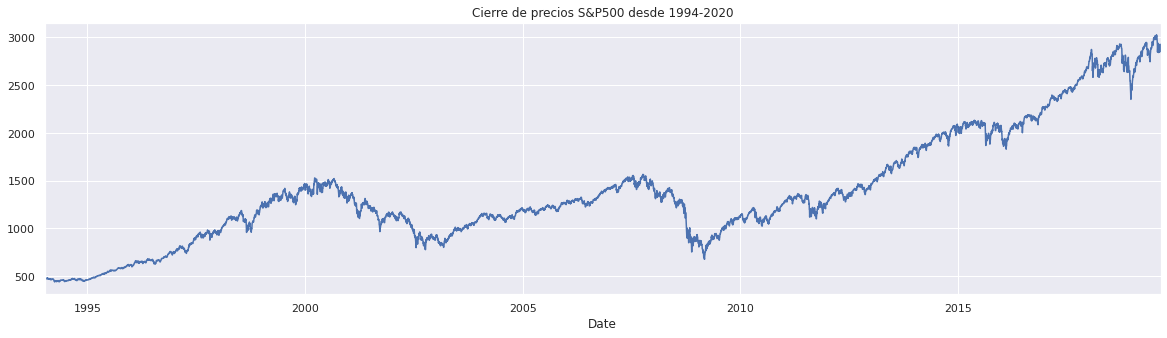

In [207]:
import matplotlib.pyplot as plt
df_comp.spx.plot(figsize=(20,5), title = "Cierre de precios S&P500 desde 1994-2020")
plt.show()

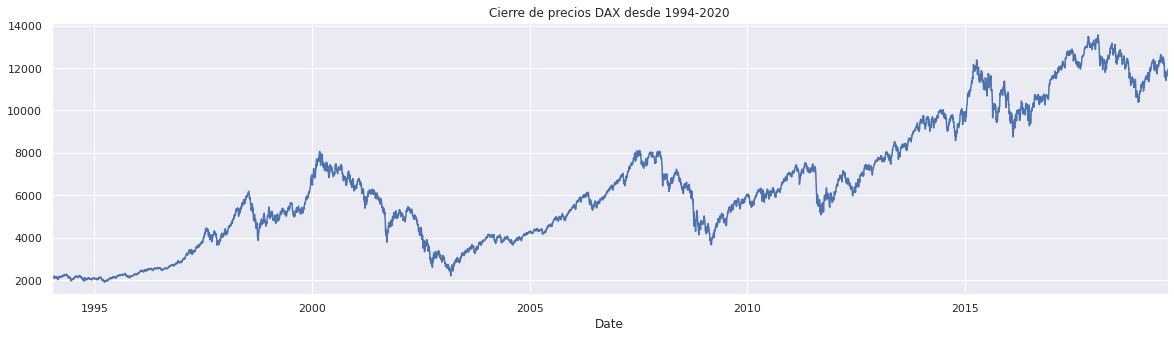

In [208]:
df_comp.dax.plot(figsize=(20,5), title = "Cierre de precios DAX desde 1994-2020")
plt.show()

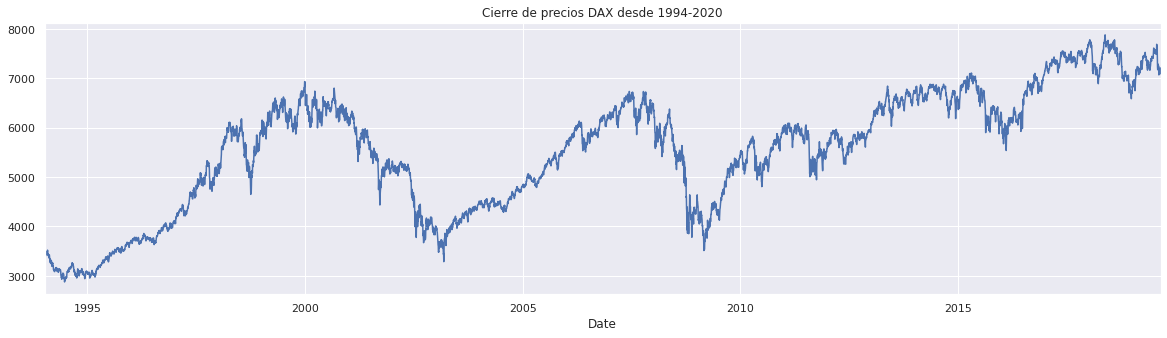

In [209]:
df_comp.ftse.plot(figsize=(20,5), title = "Cierre de precios DAX desde 1994-2020")
plt.show()

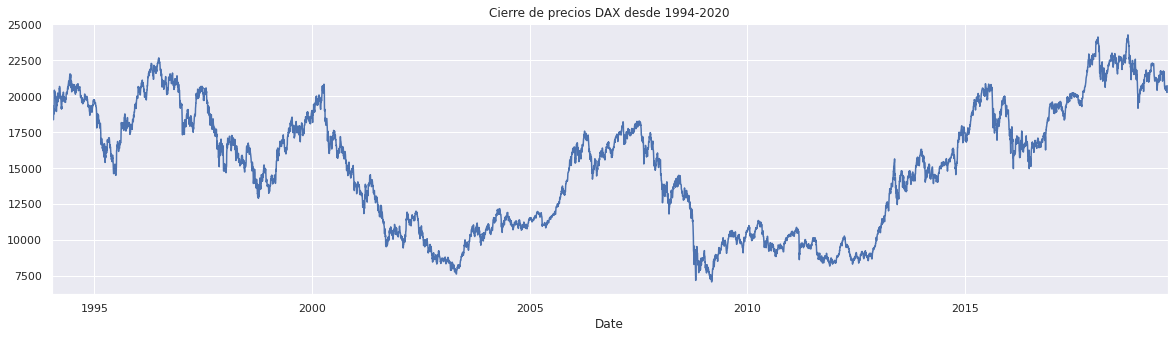

In [210]:
df_comp.nikkei.plot(figsize=(20,5), title = "Cierre de precios DAX desde 1994-2020")
plt.show()

In [211]:
#Importamos algunas librerias
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")


from statsmodels.tsa.statespace.sarimax import SARIMAX

In [212]:
#La serie por si sola no es estacionaria
sts.adfuller(df_comp.ftse)

(-1.8628476509554608,
 0.349735411580107,
 6,
 6683,
 {'1%': -3.43132887378793,
  '10%': -2.5670002589136938,
  '5%': -2.8619725803448017},
 72976.973855644)

In [213]:
#Creamos los retornos (tasa de cambio entre un periodo y otro) de la variables "ftse"
#Todo esto para hacer la prueba de DICKEY FULLER y sabes con cuantas diferenciaciones o con que transformación la series ya es estacionaria
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [215]:
#Se acepta la prueba
sts.adfuller(df_comp.ret_ftse[1:])

(-15.513903962616295,
 2.3295896258277874e-28,
 34,
 6654,
 {'1%': -3.4313331416421957,
  '10%': -2.567001262721985,
  '5%': -2.8619744660675264},
 20073.280970700987)

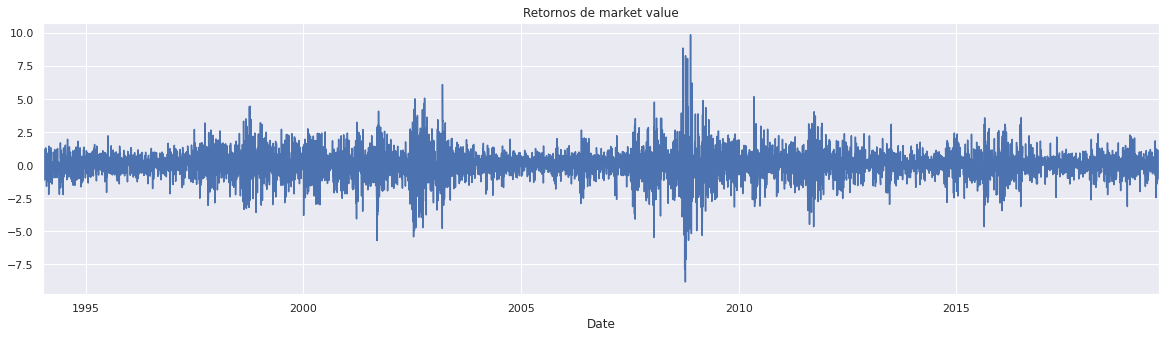

In [217]:
df_comp.ret_ftse.plot(figsize=(20,5), title = "Retornos de market value")
plt.show()

In [218]:
df_comp.head()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei
,,,,,,,,
Date,,,,,,,,
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,NaN,NaN,NaN,NaN
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,-0.239860,-0.778935,0.139330,0.226696
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,0.008438,-1.224443,-2.066336,1.669606
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766,-0.358524,-0.355872,-1.818921,-1.152615
1994-01-14,474.910004,2151.050049,3400.600098,18973.699219,0.516435,1.208336,0.405156,2.134004


In [219]:
#Obtenermos la diferencia de los precios entre periodos de la variable "market_value"
df_comp['delta_prices']=df_comp.ftse.diff(1)

In [220]:
#Se acepta la prueba
sts.adfuller(df_comp.delta_prices[1:])

(-36.75497660725235,
 0.0,
 5,
 6683,
 {'1%': -3.43132887378793,
  '10%': -2.5670002589136938,
  '5%': -2.8619725803448017},
 72967.5689292642)

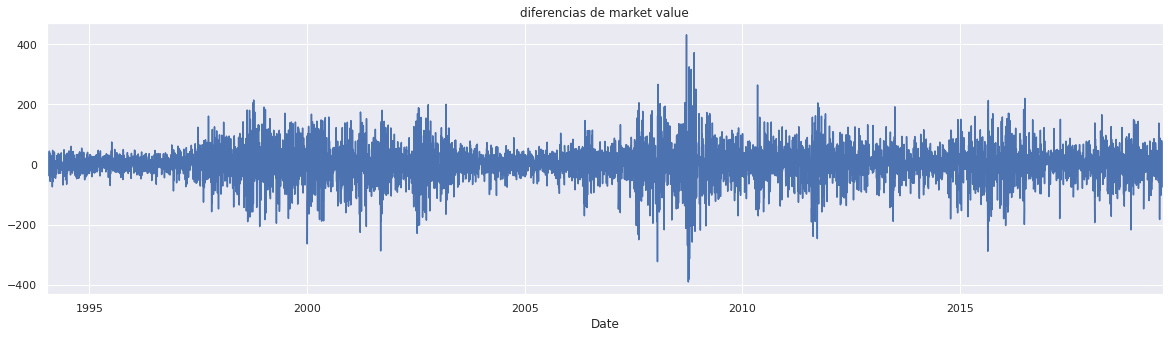

In [221]:
df_comp.delta_prices.plot(figsize=(20,5), title = "diferencias de market value")
plt.show()

#MODELO

In [222]:
model_ret_armax = ARIMA(df_comp.ret_ftse[1:], exog = df_comp[["ret_spx","ret_dax","ret_nikkei"]][1:], order = (1,0,1))
results_ret_armax = model_ret_armax.fit()

results_ret_armax.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 6689
Model:                     ARMA(1, 1)   Log Likelihood               -6664.882
Method:                       css-mle   S.D. of innovations              0.655
Date:                Mon, 28 Sep 2020   AIC                          13343.763
Time:                        17:40:23   BIC                          13391.421
Sample:                    01-11-1994   HQIC                         13360.223
                         - 08-30-2019                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0066      0.007     -0.982      0.326      -0.020       0.007
ret_spx            0.1088      0.009     11.989      0.000       0.091       0.127
ret_dax            0.5475      0.007     74.763      0.000       0.533       0.562
ret_nikkei         0.0713      0.006     12.175      0.000       0.060       0.083
ar.L1.ret_ftse     0.3837      0.114      3.360      0.001       0.160       0.608
ma.L1.ret_ftse    -0.4868      0.108     -4.505      0.000      -0.699      -0.275
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.6061           +0.0000j            2.6061            0.0000
MA.1            2.0541           +0.0000j            2.0541            0.0000
-----------------------------------------------------------------------------
"""

#**Predicciones**

In [223]:
len(df_comp)

6690

In [225]:
print(df_comp.index[0])
print(df_comp.index[2289])

1994-01-10 00:00:00
2002-10-18 00:00:00


In [229]:
start_date = df_comp.index[1]
end_date = df_comp.index[2289]

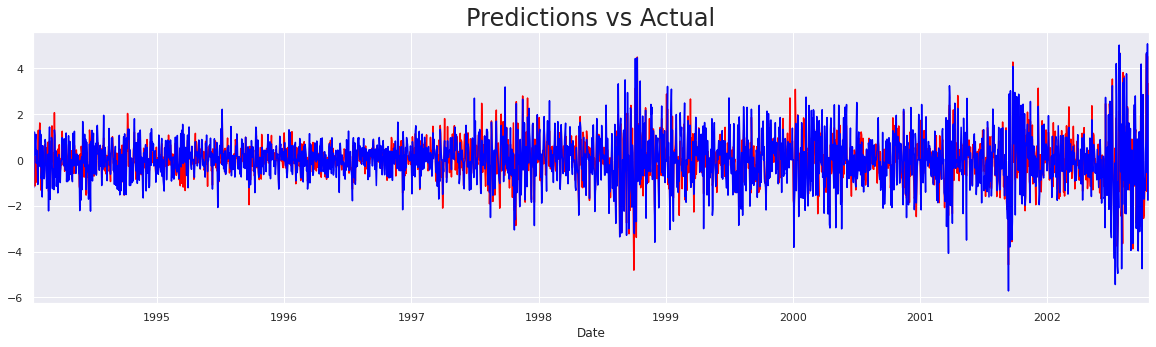

In [233]:
df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date, 
                                          exog = df_comp[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_comp.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

